C:\Users\Ars\AppData\Local\Temp\ipykernel_14872\850665871.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


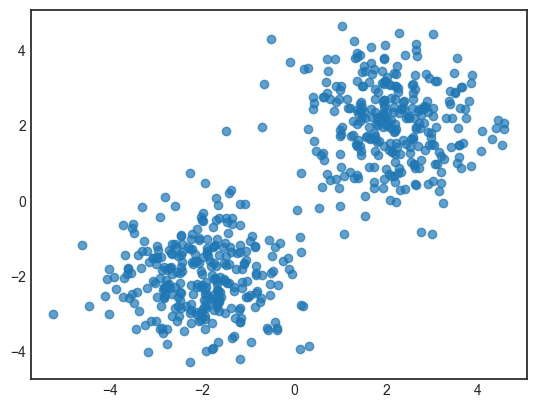

In [27]:
from sklearn.svm import SVC
# note in general when wanting to do SVC with linear kernel, use LinearSVC instead of 
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

plt.style.use("seaborn-white")

# we simulate data points 
blobs = make_blobs([300, 300], 2, centers = [(-2,-2),(2,2)], random_state=42)[0]
plt.scatter(blobs[:,0], blobs[:,1], alpha=0.7)

# a problem is that we don't have any labels, and SVM is a supervised learning algorithm

<Axes: xlabel='X1', ylabel='X2'>

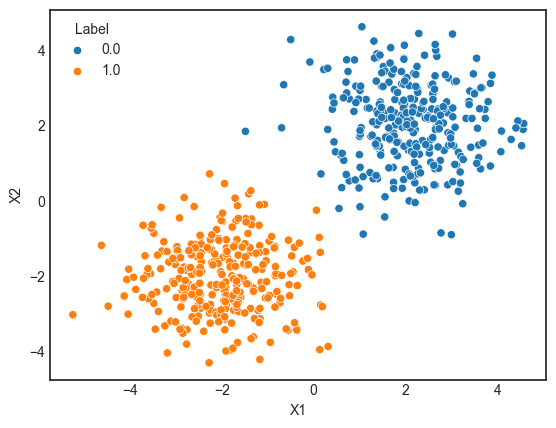

In [28]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(2)

kmeans.fit(blobs)
blobs = np.c_[blobs, kmeans.predict(blobs)]

df = pd.DataFrame(blobs, columns=["X1","X2","Label"])

sns.scatterplot(df, x = "X1", y="X2", hue = "Label")
 

In [29]:
from utils import plot_svm_margins


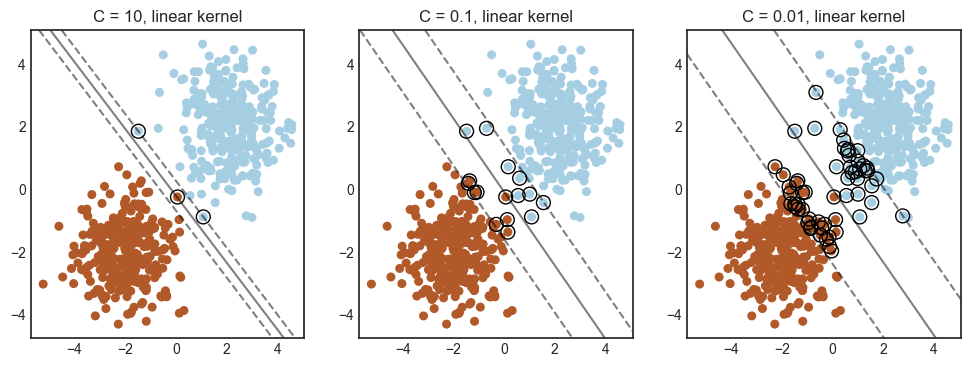

In [30]:
X, y = df.drop("Label", axis = 1).to_numpy(), df["Label"].to_numpy()
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

# C is a regularization parameter inversely proportional to C in theory
for i, C in enumerate([10, 0.1, 0.01], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel = "linear", C=C), X, y) 
    ax[i - 1].set(title=f"C = {C}, linear kernel")

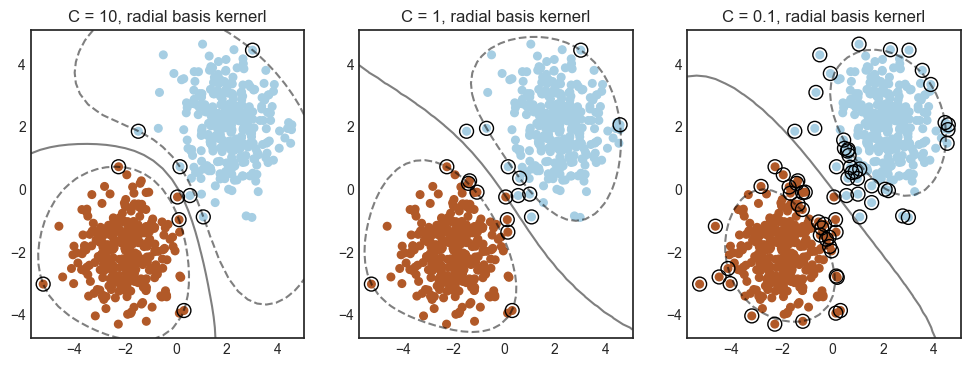

In [32]:
X, y = df.drop("Label", axis = 1).to_numpy(), df["Label"].to_numpy()
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

# C is a regularization parameter inversely proportional to C in theory
for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel = "rbf", C=C), X, y) 
    ax[i - 1].set(title=f"C = {C}, radial basis kernerl")

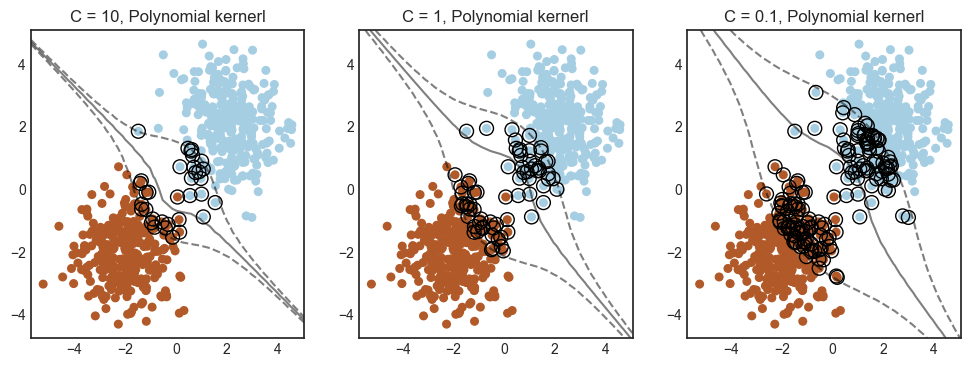

In [33]:
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

# C is a regularization parameter inversely proportional to C in theory
for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel = "poly", C=C), X, y) 
    ax[i - 1].set(title=f"C = {C}, Polynomial kernerl")

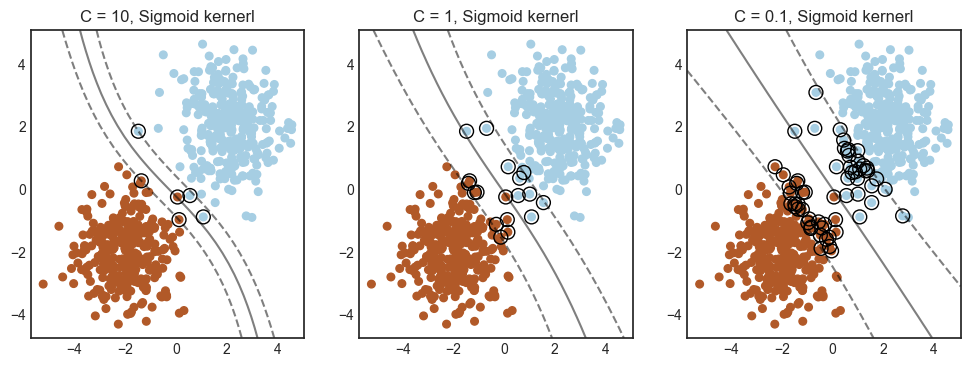

In [34]:
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

# C is a regularization parameter inversely proportional to C in theory
for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel = "sigmoid", C=C), X, y) 
    ax[i - 1].set(title=f"C = {C}, Sigmoid kernerl")